In [1]:
import os
import pandas as pd
import numpy as np
#import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('bmh')

In [2]:
# Setting the working directory
os.chdir("C:\\Users\\RetailAdmin\\Documents\\Jigsaw\\Stock market Prediction")
os.getcwd()

'C:\\Users\\RetailAdmin\\Documents\\Jigsaw\\Stock market Prediction'

In [3]:
# Reading the csv, xlsx file
stock=pd.read_csv("GOOG_StockData.csv",na_values=[""," ","N/A","NA"])

In [4]:
# normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
stock1=stock.copy()

In [6]:
stock.shape

(1259, 7)

In [7]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [8]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,1038.785647,1048.701819,1029.154337,1039.409947,1039.409947,1.689420e+06
std,241.174252,244.727230,238.153898,241.626692,241.626692,7.777893e+05
min,597.280029,605.000000,590.219971,594.969971,594.969971,3.475000e+05
25%,797.370025,802.850006,793.095002,796.879975,796.879975,1.213200e+06
50%,1055.089966,1067.000000,1044.087036,1054.790039,1054.790039,1.487400e+06
75%,1195.200012,1203.832519,1185.104981,1194.975037,1194.975037,1.930950e+06
max,1709.713989,1733.180054,1666.329956,1728.280029,1728.280029,6.653900e+06


In [9]:
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/29/2015,597.280029,605.000000,590.219971,594.969971,594.969971,2309500
1,9/30/2015,603.280029,608.760010,600.729980,608.419983,608.419983,2413400
2,10/1/2015,608.369995,612.090027,599.849976,611.289978,611.289978,1867600
3,10/2/2015,607.200012,627.340027,603.130005,626.909973,626.909973,2684800
4,10/5/2015,632.000000,643.010010,627.000000,641.469971,641.469971,1803600


In [10]:
stock['Volume']=stock['Volume'].astype(float)

In [11]:
stock.isnull().values.any()

False

In [12]:
#merged_dataframe.index = merged_dataframe.index.sort_values()
#merged_dataframe.head()

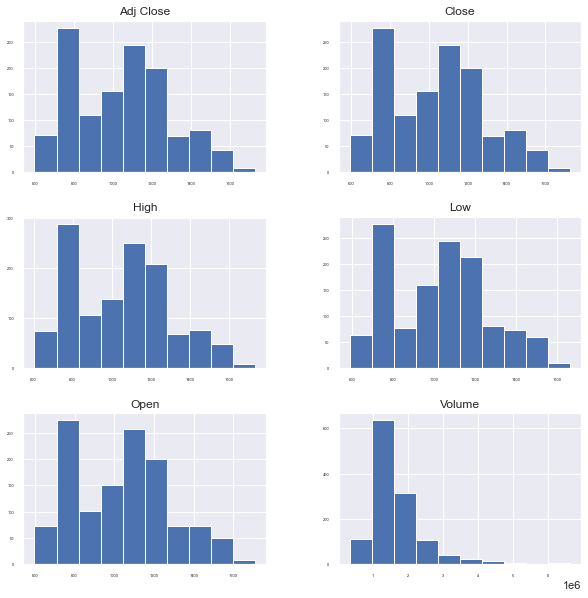

In [13]:
# Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
stock.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(10, 10))
plt.show()

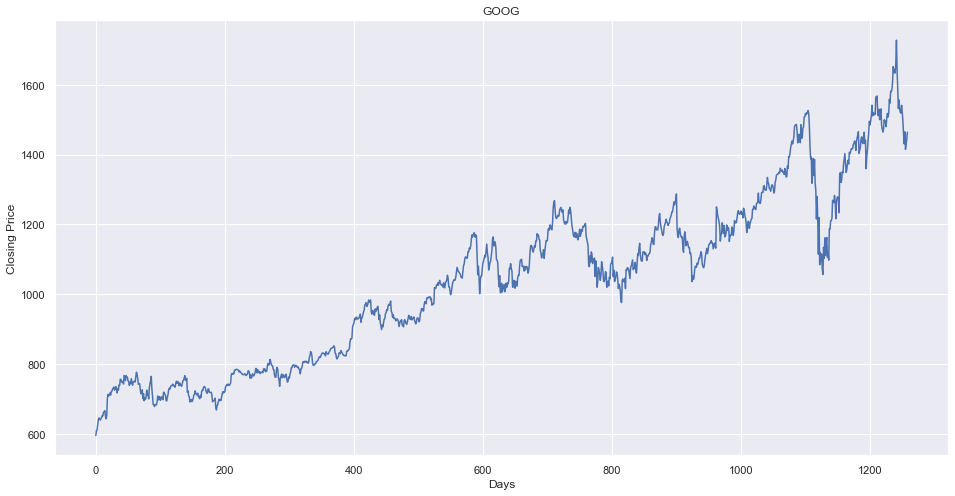

In [14]:
#visualising the closing price data
plt.figure(figsize=(16,8))
plt.title('GOOG')
plt.xlabel('Days')
plt.ylabel('Closing Price')
plt.plot(stock['Close'])
plt.show()

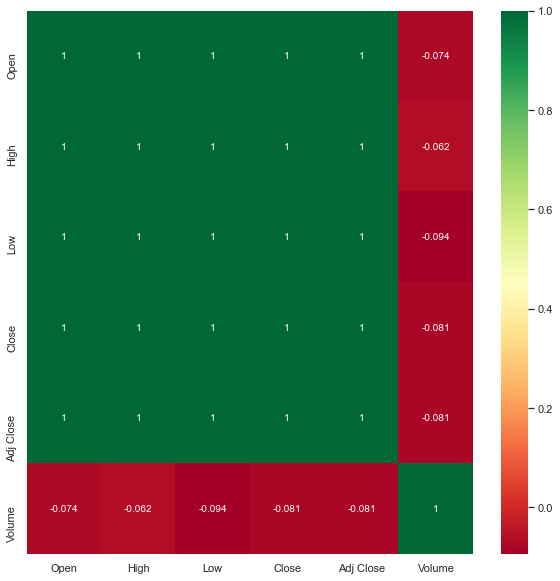

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(stock.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [16]:
live_pred_data = stock.iloc[-17:-8]
print(live_pred_data)

           Date         Open         High          Low        Close  \
1242   9/3/2020  1709.713989  1709.713989  1615.060059  1641.839966   
1243   9/4/2020  1624.260010  1645.109985  1547.613037  1591.040039   
1244   9/8/2020  1533.510010  1563.864990  1528.010010  1532.390015   
1245   9/9/2020  1557.530029  1569.000000  1536.051025  1556.959961   
1246  9/10/2020  1560.640015  1584.081055  1525.805054  1532.020020   
1247  9/11/2020  1536.000000  1575.199951  1497.359985  1520.719971   
1248  9/14/2020  1539.005005  1564.000000  1515.739990  1519.280029   
1249  9/15/2020  1536.000000  1559.569946  1531.834961  1541.439941   
1250  9/16/2020  1555.540039  1562.000000  1519.819946  1520.900024   

        Adj Close     Volume  
1242  1641.839966  3107800.0  
1243  1591.040039  2608600.0  
1244  1532.390015  2610900.0  
1245  1556.959961  1774700.0  
1246  1532.020020  1618600.0  
1247  1520.719971  1597100.0  
1248  1519.280029  1696600.0  
1249  1541.439941  1331100.0  
1250  1520

In [17]:
#Create a variable to predict 'x' days out in future
future_days=15
#Create a new column(target) shifted 'x' units/day up
stock['Prediction']=stock[['Close']].shift(-future_days)
print(stock.head())
print(type(stock))

        Date        Open        High         Low       Close   Adj Close  \
0  9/29/2015  597.280029  605.000000  590.219971  594.969971  594.969971   
1  9/30/2015  603.280029  608.760010  600.729980  608.419983  608.419983   
2  10/1/2015  608.369995  612.090027  599.849976  611.289978  611.289978   
3  10/2/2015  607.200012  627.340027  603.130005  626.909973  626.909973   
4  10/5/2015  632.000000  643.010010  627.000000  641.469971  641.469971   

      Volume  Prediction  
0  2309500.0  650.280029  
1  2413400.0  642.609985  
2  1867600.0  651.789978  
3  2684800.0  702.000000  
4  1803600.0  712.780029  
<class 'pandas.core.frame.DataFrame'>


In [18]:
stock=stock.dropna()

In [19]:
stock.shape[0]

1244

In [20]:
stock_1=stock.drop(['Date','Adj Close'],axis=1)

In [21]:
stock_1.head()

,Open,High,Low,Close,Volume,Prediction
0,597.280029,605.000000,590.219971,594.969971,2309500.0,650.280029
1,603.280029,608.760010,600.729980,608.419983,2413400.0,642.609985
2,608.369995,612.090027,599.849976,611.289978,1867600.0,651.789978
3,607.200012,627.340027,603.130005,626.909973,2684800.0,702.000000
4,632.000000,643.010010,627.000000,641.469971,1803600.0,712.780029


In [22]:
rows = stock.values.tolist()
X1=[]
for row in rows:
    X1.append(int(''.join(row[0].split('/'))))


In [23]:
s_1=pd.DataFrame({'Date':X1})

In [24]:
s_1

,Date
0,9292015
1,9302015
2,1012015
3,1022015
4,1052015
...,...
1239,8312020
1240,912020
1241,922020
1242,932020


In [25]:
stockdf=s_1.join(stock_1,how='outer')

In [26]:
stockdf.head()

,Date,Open,High,Low,Close,Volume,Prediction
0,9292015,597.280029,605.000000,590.219971,594.969971,2309500.0,650.280029
1,9302015,603.280029,608.760010,600.729980,608.419983,2413400.0,642.609985
2,1012015,608.369995,612.090027,599.849976,611.289978,1867600.0,651.789978
3,1022015,607.200012,627.340027,603.130005,626.909973,2684800.0,702.000000
4,1052015,632.000000,643.010010,627.000000,641.469971,1803600.0,712.780029


In [27]:
stockdf.tail()

,Date,Open,High,Low,Close,Volume,Prediction
1239,8312020,1647.890015,1647.964966,1630.310059,1634.180054,1823400.0,1465.459961
1240,912020,1636.630005,1665.729980,1632.219971,1660.709961,1826700.0,1415.209961
1241,922020,1673.775024,1733.180054,1666.329956,1728.280029,2511200.0,1428.290039
1242,932020,1709.713989,1709.713989,1615.060059,1641.839966,3107800.0,1444.959961
1243,942020,1624.260010,1645.109985,1547.613037,1591.040039,2608600.0,1464.520020


In [28]:
X=np.array(stockdf.drop(['Prediction'],axis=1)[:-future_days])
print(X)

[[9.29201500e+06 5.97280029e+02 6.05000000e+02 5.90219971e+02
  5.94969971e+02 2.30950000e+06]
 [9.30201500e+06 6.03280029e+02 6.08760010e+02 6.00729980e+02
  6.08419983e+02 2.41340000e+06]
 [1.01201500e+06 6.08369995e+02 6.12090027e+02 5.99849976e+02
  6.11289978e+02 1.86760000e+06]
 ...
 [8.12202000e+06 1.48557996e+03 1.51238599e+03 1.48525000e+03
  1.50662000e+03 1.43770000e+06]
 [8.13202000e+06 1.51033997e+03 1.53725000e+03 1.50800500e+03
  1.51844995e+03 1.45520000e+06]
 [8.14202000e+06 1.51566003e+03 1.52190002e+03 1.50288000e+03
  1.50772998e+03 1.35480000e+06]]


In [29]:
X.shape[0]

1229

In [30]:
# Create the taeget dataset 'y' and convert it to a numpy array
y=np.array(stockdf['Prediction'])[:-future_days]

In [31]:
y

array([ 650.280029,  642.609985,  651.789978, ..., 1728.280029,
       1641.839966, 1591.040039])

In [32]:
y.shape

(1229,)

In [33]:
# train and test are used to simulate the entire data..which will be used for building model for prediction
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=7)

In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as XG
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Common sklearn Model Helpers
#from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


C:\Users\RetailAdmin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('SVM',SVR()))
models.append(('Random Forest', RandomForestRegressor(n_estimators=100)))
models.append(('Decision Tree Regressor',
               DecisionTreeRegressor()))
models.append(('xgboost',
               XGBRegressor()))

In [36]:
acc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm','Score Mean', 'Score STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=5, random_state=7)  # 10-fold cross-validation

    cv_score_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold)

    acc_results.append(cv_score_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_score_results.mean()*100, 2),
                         round(cv_score_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['Score Mean'], ascending=False)

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\RetailAdmin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no eff

,Algorithm,Score Mean,Score STD
2,Random Forest,95.55,1.03
4,xgboost,95.28,1.01
0,Linear Regression,93.01,1.32
3,Decision Tree Regressor,92.60,1.49
1,SVM,-0.88,1.11


In [40]:
# Random Forest Regressor

rg_rf = RandomForestRegressor(n_estimators=100)
rg_rf.fit(X_train,y_train)
y_pred_rf = rg_rf.predict(X_test)

# Xgboost

#rg_xg= XGBRegressor()
#rg_xg.fit(X_train,y_train)

In [41]:
#print("Accuracy of Linear Regerssion Model:",rg_lr.score(X_test,y_test))
#print("Accuracy of SVM-RBF Model:",rg_svr.score(X_test,y_test))
print("Accuracy of Random Forest Model:",rg_rf.score(X_test,y_test))
#print("Accuracy of Decision Tree Model:",rg_dt.score(X_test,y_test))
#print("Accuracy of XGBoost Model:",rg_xg.score(X_test,y_test))

Accuracy of Random Forest Model: 0.9564564023211086


In [42]:
y_pred_rf = rg_rf.predict(X_test)
y_pred_rf

array([ 958.76829847,  960.70339118,  770.71488782, 1106.71899229,
       1058.00549372, 1029.22898772, 1525.32519055, 1326.9743152 ,
       1517.95838377, 1200.87359742,  750.96269837, 1285.36471421,
        714.72520517, 1133.5562073 ,  857.54360703, 1204.13860233,
       1062.67541265, 1018.82120108,  764.67744822, 1176.59969733,
       1092.15221939, 1082.29548833,  717.09929684,  947.86869805,
       1208.40660038,  717.66760266,  777.89340642,  836.62608886,
        774.6103931 , 1055.80101319,  714.81320271,  774.12340652,
       1131.13438355, 1128.71921579, 1150.80599429, 1169.44039984,
       1130.11350172,  919.37049678,  732.41250449, 1115.95230235,
        951.20210323, 1194.63909426, 1116.19440925, 1220.99049672,
        707.19830208,  846.66400256, 1208.91420043,  741.99870414,
        933.31070361, 1171.51979317,  772.27329713, 1125.99358762,
       1430.69138055, 1074.99799612, 1192.47399059,  847.75510177,
       1510.41249636,  721.97050541, 1059.32479794,  726.53769

In [43]:
y_pred_rf.shape[0]

246

In [44]:
stockdf1=pd.DataFrame(stock['Close'])
stockdf1

,Close
0,594.969971
1,608.419983
2,611.289978
3,626.909973
4,641.469971
...,...
1239,1634.180054
1240,1660.709961
1241,1728.280029
1242,1641.839966


In [47]:
# Get the last 'x' rows of feature dataset
x_future=stockdf.drop(['Prediction'],axis=1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[7.27202000e+06, 1.51559998e+03, 1.54096997e+03, 1.51520996e+03,
        1.53019995e+03, 1.24600000e+06],
       [7.28202000e+06, 1.52518005e+03, 1.52647998e+03, 1.49766003e+03,
        1.50033997e+03, 1.70220000e+06],
       [7.29202000e+06, 1.50631995e+03, 1.53125195e+03, 1.50132996e+03,
        1.52202002e+03, 1.10650000e+06],
       [7.30202000e+06, 1.49700000e+03, 1.53787000e+03, 1.49221997e+03,
        1.53144995e+03, 1.67140000e+06],
       [7.31202000e+06, 1.50501001e+03, 1.50894995e+03, 1.45403003e+03,
        1.48295996e+03, 3.43990000e+06],
       [8.32020000e+05, 1.48664001e+03, 1.49046997e+03, 1.46564001e+03,
        1.47444995e+03, 2.33020000e+06],
       [8.42020000e+05, 1.47656995e+03, 1.48556006e+03, 1.45865002e+03,
        1.46496997e+03, 1.90350000e+06],
       [8.52020000e+05, 1.46930005e+03, 1.48241003e+03, 1.46345996e+03,
        1.47360999e+03, 1.97950000e+06],
       [8.62020000e+05, 1.47175000e+03, 1.50239001e+03, 1.46600000e+03,
        1.50009998e+03, 

In [48]:
rf_pred=rg_rf.predict(x_future)

C:\Users\RetailAdmin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


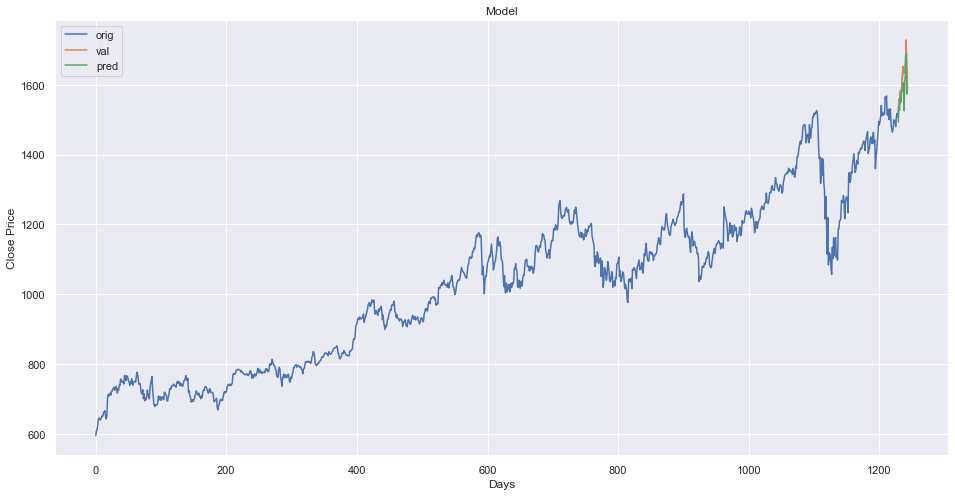

In [49]:
#Visualisation
predictions=rf_pred
valid=stockdf[X.shape[0]:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(stockdf['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['orig','val','pred'])
plt.show()